# Results

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
import scipy.stats
import re
import os
import pandas as pd
import seaborn as sns

In [3]:
sys.path.append('../codes')

In [4]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *
from VMSfunctions.Noise import *

In [5]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'

In [6]:
# base_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\'

## A. MS1 Spectra in ToppView

## B. CentWave

Load mzML in peak picking, and see if the same peaks are picked again.

![title](img/placeholder.png)

Boxplot comparing the intensity and number of peaks per scan distributions of MS1 peaks in the simulator vs picked peaks.
- X-axis: samples
- Y-axis: log_2 intensity

In [7]:
df = pd.read_csv(os.path.join(base_dir, 'Manuscript\\B. CentWave\\mzML\\extracted_peaks_ms1.csv'))

In [9]:
min_ms1_intensity = 2.5E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1050)]

In [10]:
intensity_col = 'maxo'
df = df[(df['rt'] > rt_range[0][0]) & (df['rt'] < rt_range[0][1])]
df = df[(df['rt'] > mz_range[0][0]) & (df['rt'] < mz_range[0][1])]
df = df[(df[intensity_col] > min_ms1_intensity)]
df['log_intensity'] = df.apply(lambda row: np.log(row[intensity_col]), axis=1)

In [11]:
df.head()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,filename,log_intensity
750,144.927427,144.927414,144.927429,183.153,180.803,187.447,2.250382e+06,2.249581e+06,362842.78125,237,1,0,1,Beer_multibeers_1_T10_POS.mzML,12.801725
752,144.927423,144.927414,144.927444,190.271,187.447,193.056,1.881383e+06,1.880697e+06,354913.84375,232,1,0,1,Beer_multibeers_1_T10_POS.mzML,12.779630
758,144.927420,144.927414,144.927429,194.628,193.056,196.019,9.907583e+05,9.903845e+05,341178.93750,223,1,0,1,Beer_multibeers_1_T10_POS.mzML,12.740162
905,416.287359,416.287262,416.287476,203.562,197.891,214.562,2.816761e+06,2.814201e+06,282655.46875,144,1,0,1,Beer_multibeers_1_T10_POS.mzML,12.551984
951,275.163931,275.163849,275.164001,203.562,197.356,217.851,3.398315e+06,3.391158e+06,347291.37500,134,1,0,1,Beer_multibeers_1_T10_POS.mzML,12.757919


In [12]:
def make_boxplot(df, x, y, xticklabels, title):
    g = sns.catplot(x=x, y=y,  kind='box', data=df)
    if xticklabels is not None:
        g.set_xticklabels(xticklabels, rotation=90)
    else:
        g.set_xticklabels(rotation=90)        
    plt.title(title)
    plt.tight_layout()

In [13]:
df.groupby('filename').median()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,log_intensity
filename,,,,,,,,,,,,,,
Beer_multibeers_1_T10_POS.mzML,245.185763,245.185623,245.185806,535.500000,515.446000,553.764000,8.480185e+06,8.291979e+06,619540.81250,63.0,1.0,0.0,1.0,13.336734
Beer_multibeers_2_T10_POS.mzML,251.155055,251.154900,251.155205,496.563000,476.251000,513.606000,9.635722e+06,9.352157e+06,688746.15625,50.0,2.0,0.0,1.0,13.442628
Beer_multibeers_3_T10_POS.mzML,241.179595,241.179520,241.179642,575.216000,556.651000,593.693000,8.469015e+06,8.148377e+06,598816.43750,85.0,3.0,0.0,1.0,13.302710
no_noise_ms1_controller.mzML,214.693481,214.693481,214.693481,542.178257,537.068547,546.604132,4.214744e+06,4.214732e+06,493267.31250,487704.5,4.0,0.0,1.0,13.108807


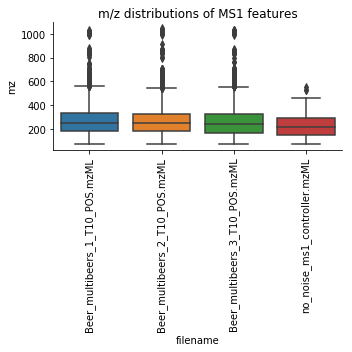

In [14]:
make_boxplot(df, 'filename', 'mz', None, 
             'm/z distributions of MS1 features')

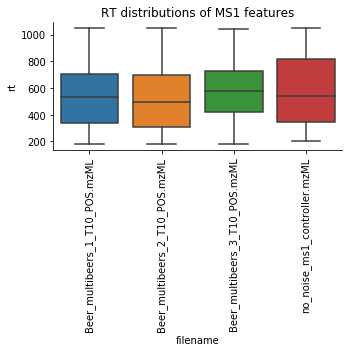

In [15]:
make_boxplot(df, 'filename', 'rt', None, 
             'RT distributions of MS1 features')

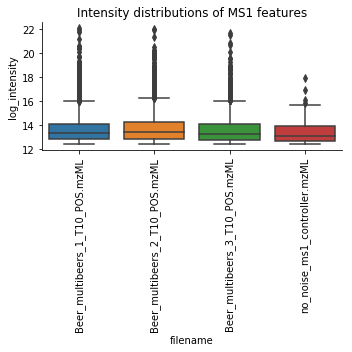

In [16]:
make_boxplot(df, 'filename', 'log_intensity', None, 
             'Intensity distributions of MS1 features')

## C. Top-N DDA Fragmentation Compared to the Real Data

Load beer1pos file and run it through DDA controller.
- Boxplot of the number of MS1/MS2 peaks per scan of simulated vs original

In [ ]:
def get_df(data_type, filename, ms_level, controller, log=False):
    observed_values = ds.get_data(data_type, filename, ms_level, max_data=1E8)
    
    simulated_values = []    
    if data_type == N_PEAKS:
        simulated_values = [scan.num_peaks for scan in controller.scans[ms_level]]
    elif data_type == RT:
        simulated_values = [scan.rt for scan in controller.scans[ms_level]]        
    elif data_type == MZ:
        for scan in controller.scans[ms_level]:
            if len(scan.mzs) > 0:
                simulated_values.extend(scan.mzs)
    elif data_type == INTENSITY:
        for scan in controller.scans[ms_level]:
            if len(scan.intensities) > 0:
                simulated_values.extend(scan.intensities)        
    simulated_values = np.array(simulated_values)
    
    if log:
        observed_values = np.log(observed_values)
        simulated_values = np.log(simulated_values)

    col1 = np.append(observed_values, simulated_values)
    col2 = np.append(np.array([0] * len(observed_values)), np.array([1] * len(simulated_values)))
    
    col1.astype(np.int)
    col2.astype(np.int)
    
    df = pd.DataFrame(np.stack([col1, col2], axis=1), columns=[data_type, 'filename'])
    return df

In [ ]:
mzml_path = os.path.join(base_dir, 'Data\\multibeers_urine_data\\beers\\fragmentation')
ds = DataSource()
ds.load_data(mzml_path)

In [ ]:
controller = load_obj(os.path.join(base_dir, 'Manuscript\\C. Top-N DDA Fragmentation Compared to the Real Data\\mzML\\experiment_N_10_rttol_15.p'))

In [ ]:
filename = 'Beer_multibeers_1_T10_POS.mzML'
ms_level = 1

In [ ]:
df = get_df(MZ, filename, ms_level, controller)
make_boxplot(df, 'filename', MZ, ['beer1', 'simulated'], 
             'mz distributions of MS%d peaks' % ms_level)

df = get_df(RT, filename, ms_level, controller)
make_boxplot(df, 'filename', RT, ['beer1', 'simulated'], 
             'RT distributions of MS%d peaks' % ms_level)

df = get_df(INTENSITY, filename, ms_level, controller, log=True)
make_boxplot(df, 'filename', INTENSITY, ['beer1', 'simulated'], 
             'Intensity distributions of MS%d peaks' % ms_level)

df = get_df(N_PEAKS, filename, ms_level, controller)
make_boxplot(df, 'filename', 'n_peaks', ['beer1', 'simulated'], 
             'Number of peaks per scan of MS%d peaks' % ms_level)

In [ ]:
filename = 'Beer_multibeers_1_T10_POS.mzML'
ms_level = 2

In [ ]:
df = get_df(MZ, filename, ms_level, controller)
make_boxplot(df, 'filename', MZ, ['beer1', 'simulated'], 
             'mz distributions of MS%d peaks' % ms_level)

df = get_df(RT, filename, ms_level, controller)
make_boxplot(df, 'filename', RT, ['beer1', 'simulated'], 
             'RT distributions of MS%d peaks' % ms_level)

df = get_df(INTENSITY, filename, ms_level, controller, log=True)
make_boxplot(df, 'filename', INTENSITY, ['beer1', 'simulated'], 
             'Intensity distributions of MS%d peaks' % ms_level)

df = get_df(N_PEAKS, filename, ms_level, controller)
make_boxplot(df, 'filename', 'n_peaks', ['beer1', 'simulated'], 
             'Number of peaks per scan of MS%d peaks' % ms_level)

## D. Case Study 1: Varying N in top-N DDA fragmentation

Vary Ns from the data in C and plot the following for each N:
- Proportion of the original MS1 peaks that were fragmented
- Number of MS2 peaks that map to the original MS1 peak
- 3D plot of various values for Ns vs dynamic exclusion windows?
- Number of MS1 peaks that can be picked by XCMS CentWave

In [ ]:
df = pd.read_csv(os.path.join(base_dir, 'Manuscript\\D. Case Study 1 Varying N in top-N DDA fragmentation\\mzML\\extracted_peaks_ms1.csv'))

In [ ]:
df.head()

In [ ]:
df['log_intensity'] = df.apply(lambda row: np.log(row['into']), axis=1)

In [ ]:
def make_boxplot(df, x, y, xticklabels, title):
    plt.gcf().set_size_inches(15, 5)
    g = sns.catplot(x=x, y=y,  kind='box', data=df)
    if xticklabels is not None:
        g.set_xticklabels(xticklabels, rotation=90)
    else:
        g.set_xticklabels(rotation=90)        
    plt.title(title)
    plt.tight_layout()

In [ ]:
make_boxplot(df, 'filename', 'mz', None, 
             'mz distributions of MS1 features detected by CentWave')

make_boxplot(df, 'filename', 'rt', None, 
             'rt distributions of MS1 features detected by CentWave')

make_boxplot(df, 'filename', 'log_intensity', None, 
             'Intensity distributions of MS1 features detected by CentWave')

In [ ]:
count_df = df.groupby('filename').size().reset_index(name='counts')

In [ ]:
# count_df['N'] = df.apply(lambda row: row.values, axis=1)

In [ ]:
arrays = []
for arr in count_df.values:
    N = arr[0].split('_')[2]
    arrays.append((arr[0], N, arr[1]))
arrays = np.array(arrays)

In [ ]:
df = pd.DataFrame(arrays, columns=['filename', 'N', 'count'])

In [ ]:
df['N'] = df['N'].apply(int)
df['count'] = df['count'].apply(int)

In [ ]:
df = df.sort_values('N')

In [ ]:
df.head()

In [ ]:
sns.lineplot(x='N', y='count', data=df)
plt.title('Number of MS1 features detected by CentWave')

## E. Case Study 2: Reproduce DIA results

![title](img/placeholder.png)

## F. Case Study 3: Reproduce DsDA results

Same as Table 1 in the DsDA paper:
- The percentage of all detected features that were sampled by MS/MS at least once.
- The percentage of all features detected in at least 20% of the injections that were sampled by MS/MS at least once.
- The total number of MS/MS events (absolute counts) that map to a feature

![title](img/capture1.png)

Same as Figure 1 in the DsDA paper:
- Create 20 samples, run them through DsDA with or without maxdepth.
- Figure 1. *Complex small-molecule sample injected 20 times using standard DDA (A), DsDA (B), or DsDA with the MaxDepth option enabled (C). Each panel contains a scatterplot in which each point represents an XCMS feature. All black points are plotted with sizes proportional to the number of times they were sampled for MS/MS (see legend). All points colored red remained unsampled at the end of the 20-injection sequence*

![title](img/capture2.png)